# Capstone 3: Life Expectancy Prediction by Country
## Springboard Data Science Career Track
### Capstone Project 3
### Data Preprocessing and Modeling

#### Problem Statement: 
Assessing the relation of the predictive factors and the different predictive factors that affect the life expectancy of an individual in the 193 countries.

#### Dataset: Global Health Repository within the World Health Organization

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pycountry
import plotly.express as px
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

**Reading the data**

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

The data-set is related to life expectancy and health factors for 193 countries which has been collected by World Health Organisation over a time perod of 15 years from 2000 to 2015. The dataset has 2938 rows and 22 columns.

In [4]:
df.shape

(2938, 22)

#### Preprocessing

**Checking for Missing Values**


In [5]:
missing = pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis = 1)
missing.columns = ['count', '%']
missing.sort_values(by = ['count','%'], ascending = True)

,count,%
Country,0,0.000000
Year,0,0.000000
Status,0,0.000000
infant deaths,0,0.000000
percentage expenditure,0,0.000000
Measles,0,0.000000
under-five deaths,0,0.000000
HIV/AIDS,0,0.000000
Life expectancy,10,0.340368
Adult Mortality,10,0.340368


The population column has the most missing values followed by Hepatitis B and GDP. We will use the simple imputer and fill all the null values with median values of that column.

In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median',fill_value=None)
df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [7]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [9]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Data Scaling by Normalization**

The features can be scaled using the Normalization method so that the values are between 0 and 1.

In [8]:
#separating the numerical and categorical features
df_fin = df.drop(["Country", "Status"], axis=1)
df_fin

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Data Scaling/Normalization**

The scaling of the data can be done using several methods:

Normalization: Making the values between 0 and 1
Standardization: Transforming the data so that the mean is 0 and standard deviation is 1

Since both of these are part of feature scaling, let's chose the first one and normalize the data using the MinMax Scaler and set it to be between 0 and 1.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_fin), columns=df_fin.columns)
df_norm

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.000000,0.544592,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.933333,0.447818,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.866667,0.447818,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.800000,0.440228,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.733333,0.434535,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.266667,0.151803,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,0.0168,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,0.200000,0.155598,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,0.0164,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,0.133333,0.161290,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,0.0160,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,0.066667,0.170778,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,0.0156,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


We can drop the year column as it has no correlation to life expectancy.

In [11]:

df_norm = df_norm.drop(['Year'], axis = 1)
df_norm

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.544592,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.447818,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.447818,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.440228,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.434535,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.151803,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,0.0168,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,0.155598,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,0.0164,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,0.161290,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,0.0160,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,0.170778,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,0.0156,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


Encoding needs to be done only on data of one column 'status' and Label Encoding is more appropriate as the feature is ordinal

In [12]:
#label encoding the categorical variable status
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['class'] = labelencoder.fit_transform(df['Status'])

**Train-test split**

We will use shuffle split to do a 80:20 split of the data

In [13]:
X = df_norm.drop(['Life expectancy '], axis =1)

y=df_norm['Life expectancy ']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle = True, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2350, 18) (2350,)
(588, 18) (588,)


#### Modeling

This is a regression problem and we will use 5 different models for this dataset. 
1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Random Forest Regressor
5. XGBoost Regressor

**1. Linear Regression**

In [14]:
from sklearn.linear_model import LinearRegression

Model1 = LinearRegression()

In [15]:
Model1.fit(X_train, y_train)

print(Model1.score(X_train, y_train))

0.8160433916222951


In [16]:
y_pred = Model1.predict(X_test)

In [17]:
from sklearn import metrics
print("RMSE score:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score:", metrics.r2_score(y_test, y_pred)) 

RMSE score: 0.07450605476520454
R2 score: 0.8221111322577377


Lets do a test data vs prediction graph and try to look at the amount of residuals

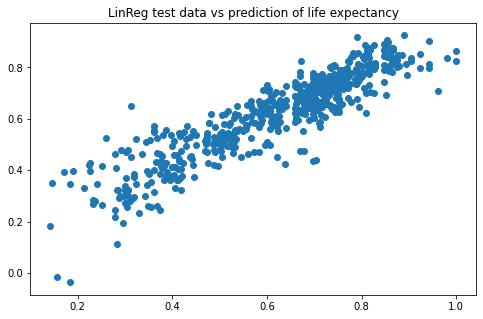

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
plt.title("LinReg test data vs prediction of life expectancy")
plt.show()

**2. Lasso Regression**

In [19]:
from sklearn.linear_model import Lasso

Model2 = Lasso(alpha=0.001)
Model2.fit(X_train,y_train)
y_pred2 = Model2.predict(X_test)

print("RMSE score:", np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("R2 score:", metrics.r2_score(y_test, y_pred2))


RMSE score: 0.0786357527756636
R2 score: 0.8018446814211


**3. Ridge Regression**

In [20]:
from sklearn.linear_model import Ridge

Model3 = Ridge(alpha=0.01)
Model3.fit(X_train,y_train)
y_pred3 = Model3.predict(X_test)

print("RMSE score:", np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print("R2 score:", metrics.r2_score(y_test, y_pred3))

RMSE score: 0.07477717301196007
R2 score: 0.8208141459228042


**4. Random Forest Regressor**

In [21]:
from sklearn.ensemble import RandomForestRegressor

Model4 = RandomForestRegressor(n_estimators = 200, random_state = 10, 
                            max_depth = 50)

Model4.fit(X_train, y_train)
y_pred4 = Model4.predict(X_test)

print("RMSE score:", np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print("R2 score:", metrics.r2_score(y_test, y_pred4))

RMSE score: 0.03171590809262751
R2 score: 0.9677655742617771


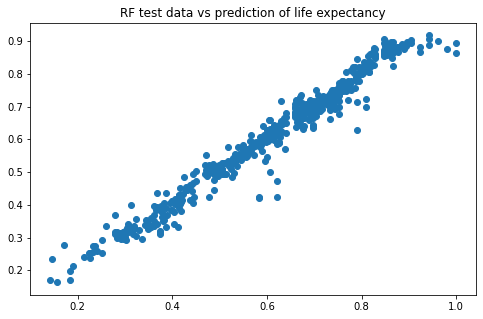

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred4)
plt.title("RF test data vs prediction of life expectancy")
plt.show()

**5. XGBoost Regressor**

In [23]:
from xgboost import XGBRegressor

Model5 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
Model5.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [24]:
y_pred5 = Model5.predict(X_test)

print("RMSE score:", np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print("R2 score:", metrics.r2_score(y_test, y_pred5))

RMSE score: 0.030094954340729025
R2 score: 0.9709762841346233


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
xg_result = cross_val_score(Model5, X_train, y_train, cv = KFold(10))
print(xg_result)
print(np.mean(xg_result))

[0.97208015 0.96094438 0.97013848 0.96206134 0.96882314 0.95665143
 0.96169856 0.95645695 0.94005649 0.9679996 ]
0.9616910506604561


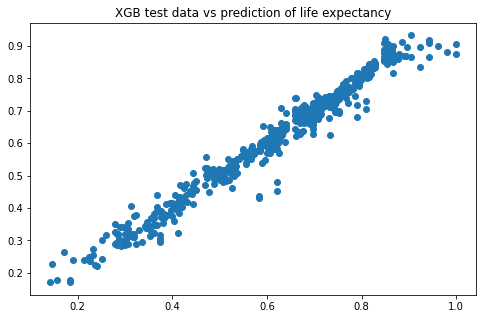

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred5)
plt.title("XGB test data vs prediction of life expectancy")
plt.show()

**Comparison between the R2 scores of different models**

Lets compare all the 5 different models based on their RMSE scores and R2 scores and try to create dataframe with the comparisons.

In [26]:
models =[]
models.append(('Linear Regression', Model1))
models.append(('Lasso Regression', Model2))
models.append(('Ridge Regression', Model3))
models.append(('Random Forest Regressor', Model4))
models.append(('XGBoost Regressor',Model5))

model_name = []
RMSE = []
R2 = []

Y_TEST_PRED = []

for name, model in models:
    model_name.append(name)
    y_test_pred = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    r2 = metrics.r2_score(y_test, y_test_pred)

    RMSE.append(rmse)
    R2.append(r2)
    Y_TEST_PRED.append(y_test_pred)

model_score = pd.DataFrame(zip(model_name, RMSE, R2) , columns=['Model Name', 'RMSE','R2'])

model_score

,Model Name,RMSE,R2
0,Linear Regression,0.074506,0.822111
1,Lasso Regression,0.078636,0.801845
2,Ridge Regression,0.074777,0.820814
3,Random Forest Regressor,0.031716,0.967766
4,XGBoost Regressor,0.030095,0.970976


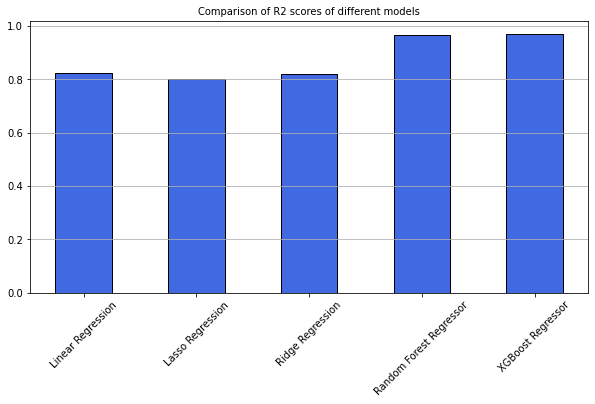

In [27]:
name = model_score['Model Name']
rmse = model_score['RMSE']
r2 = model_score['R2']

fig = plt.figure(figsize =(10,5))

plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.title("Comparison of R2 scores of different models", {'fontsize': 10})

plt.bar(name, r2, width = 0.5, color = 'royalblue', edgecolor = 'k')
plt.show()

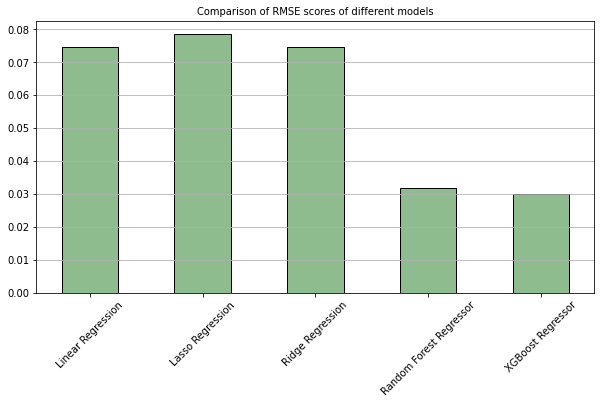

In [28]:
fig = plt.figure(figsize =(10,5))

plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.title("Comparison of RMSE scores of different models", {'fontsize': 10})

plt.bar(name, rmse, width = 0.5, color = 'darkseagreen', edgecolor = 'k')
plt.show()

Looking at the above graph, we can see that the Random Forest Regressor and the XGBoost Regressor were the best performing models. The lower the RMSE, the better a given model is able to "fit" a dataset. On the contrary, higher the R2 score, the better performing the models were.

**Feature selection using XGBoostRegressor**

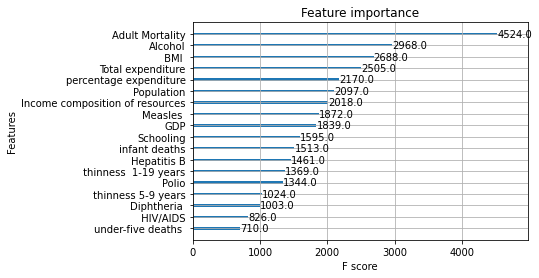

In [26]:
from xgboost import plot_importance

plot_importance(Model5)
plt.show()

**Feature selection using sklearn library**

First we will use the sequential feature selector of sklearn to check out the top 3 features and will perform a backward feature selection.

In [33]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_selector = SequentialFeatureSelector(estimator=XGBRegressor(), n_features_to_select = 10, cv =10, direction ='backward')
sfs_selector.fit(X_train, y_train)
X_train.columns[sfs_selector.get_support()]

Index(['Adult Mortality', ' thinness  1-19 years',
       'Income composition of resources'],
      dtype='object')

So we see that according to the backward feature selection, the features that got selected are:

1. Adult Mortality
2. thinness 1-19 years 
3. Income Composition of resources

Now let's see if we have the same effect on the forward feature selection as well.

In [34]:
sfs_selector = SequentialFeatureSelector(estimator=XGBRegressor(), n_features_to_select = 3, cv =10, direction ='forward')
sfs_selector.fit(X_train, y_train)
X_train.columns[sfs_selector.get_support()]

Index(['Adult Mortality', ' thinness  1-19 years',
       'Income composition of resources'],
      dtype='object')

Here we observe that using both forward as well as backward feature selection, the top 3 features to be looked at are:

1. Adult Mortality
2. thinness 1-19 years 
3. Income Composition of resources


**Hyperparameter Tuning and Validation of Models**

**a. Parameter tuning using XGBoost Regressor**

In [38]:
from sklearn.model_selection import GridSearchCV
params = [{'n_estimators': [50, 100,200,300,400,500], 
          'criterion': ['squared_error', 'absolute_error'],
           'max_depth': [10, 15, 30, 50, 100, 200],
           'max_features':['auto','sqrt','log2'],
           'random_state':[0, 10, 20, 50, 70, 100],
           'n_jobs':[-1,  1]}]
RScv = GridSearchCV(Model5, param_grid = params, 
                          n_jobs= -1, cv = 5)
RScv = RScv.fit(X_train, y_train)

[01:18:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [39]:
RScv.best_score_

0.9621561390102423

In [40]:
RScv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 20}

**Building Final Model with best parameters using XGBoost Regressor**

In [32]:

XGB_final = XGBRegressor(criterion= 'squared_error',max_depth = 10,max_features = 'auto',
 n_estimators = 200,
 n_jobs = -1,
 random_state = 20)

XGB_final.fit(X_train,y_train)

[10:54:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             criterion='squared_error', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
             max_features='auto', max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=20, ...)

In [33]:
y_pred_p1 = XGB_final.predict(X_test)

print("RMSE score:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_p1)))
print("R2 score:", metrics.r2_score(y_test, y_pred_p1))

RMSE score: 0.034128951845495324
R2 score: 0.9626739926311609


**b. Parameter Tuning for RandomForestRegressor**

In [27]:
from sklearn.model_selection import GridSearchCV
params = [{'n_estimators': [50, 100,200,300,400,500], 
          'criterion': ['squared_error', 'absolute_error'],
           'max_depth': [10, 15, 30, 50, 100, 200],
           'max_features':['auto','sqrt','log2'],
           'random_state':[0, 10, 20, 50, 70, 100],
           'n_jobs':[-1,  1]}]
RScv2 = GridSearchCV(Model4, param_grid = params, 
                          n_jobs= -1, cv = 5)
RScv2 = RScv2.fit(X_train, y_train)

In [28]:
RScv2.best_score_

0.9559293391573581

In [29]:
RScv2.best_params_

{'criterion': 'squared_error',
 'max_depth': 50,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'n_jobs': -1,
 'random_state': 50}

**Building Final Model with best parameters using RandomForestRegressor** 

In [34]:
RFreg_final = RandomForestRegressor(criterion = 'squared_error', max_depth =50,max_features = 'sqrt',
 n_estimators= 300,
 n_jobs = -1,
 random_state = 50)

RFreg_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=300,
                      n_jobs=-1, random_state=50)

In [35]:
y_pred_p2 = RFreg_final.predict(X_test)

print("RMSE score:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_p2)))
print("R2 score:", metrics.r2_score(y_test, y_pred_p2))

RMSE score: 0.03121308367744124
R2 score: 0.9687795621489876


**Plot feature importances**

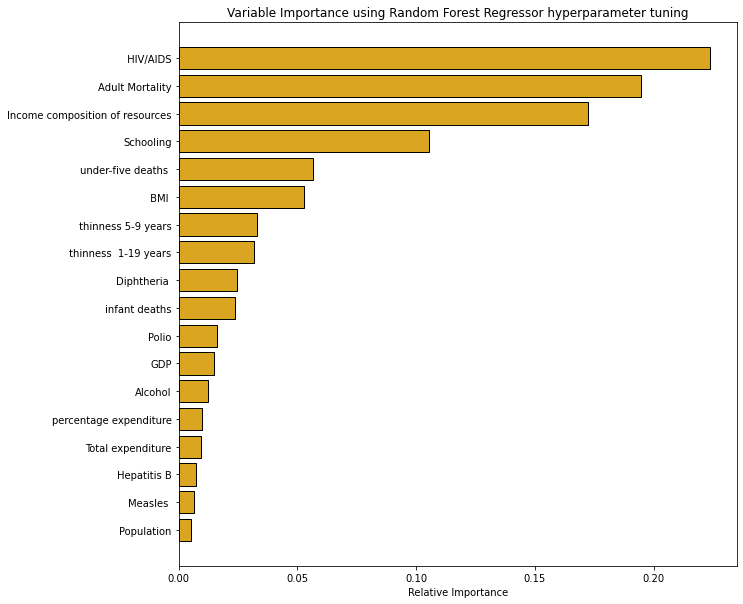

In [61]:
feature_importance = RFreg_final.feature_importances_

sorted_idx = np.argsort(feature_importance)[:18]

pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center', color = 'goldenrod', edgecolor = 'k')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance using Random Forest Regressor hyperparameter tuning')
plt.show()

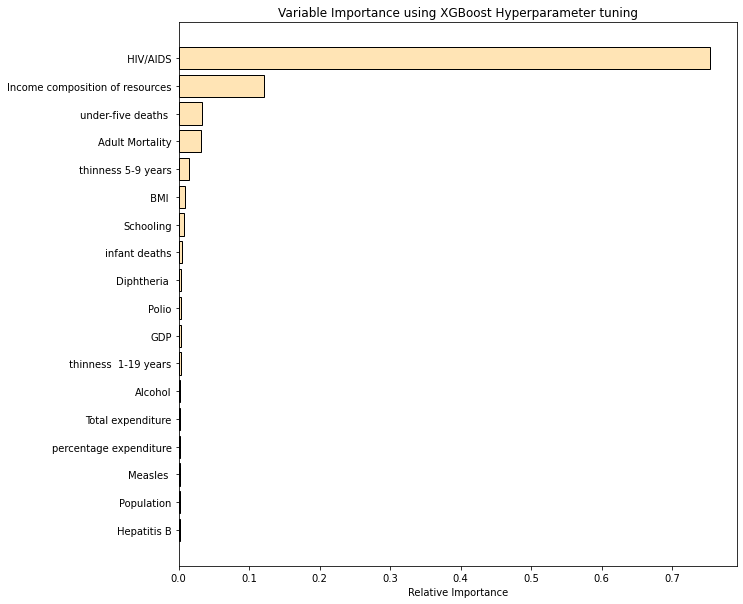

In [60]:
feature_importance2 = XGB_final.feature_importances_

sorted_idx = np.argsort(feature_importance2)[:18]

pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance2[sorted_idx], align='center', color = 'moccasin', edgecolor = 'k')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance using XGBoost Hyperparameter tuning')
plt.show()

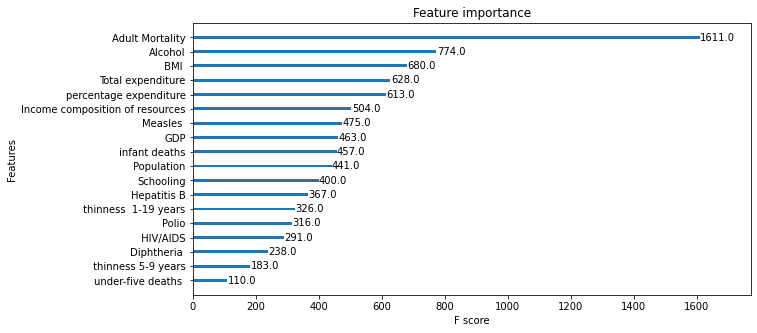

In [69]:
#Using the inbuilt plot_importance function of XGboostRegressor
fig,ax = plt.subplots(figsize = (10,5))

plot_importance(XGB_final, ax=ax, grid = False)
plt.show()